Total Margin: 189.99999999999994
Total Cash: 189.99999999999994
partition length =  0


/home/derekb/proj/option-strategy-simulator/dev/../src/option_strategy_sim/greeks.py:81: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (


partition length =  4
OptionStrategy
<class 'option_strategy_sim.core.OptionStrategy'>
{
    "underlying_price": 104.65,
    "underlying_symbol": "XYZ",
    "days_to_expiration": 42.0,
    "volatility": 0.41,
    "expected_move": 14.554634452287905,
    "pop": 0.620636949923859,
    "expected_profit": -0.011400606112013656,
    "cost": -110.00000000000006,
    "theta": -1.1752795656763304,
    "delta": -0.07669266903312255,
    "vega": 27.554242371433723,
    "title": "spread",
    "monte_carlo": false,
    "stddev_range": 3.0,
    "num_simulations": 1000,
    "r": 0.05,
    "year_days": 365
}
OptionLeg's
<class 'option_strategy_sim.leg.OptionLeg'>
{
    "option_type": "C",
    "strike_price": 111.0,
    "quantity": 1,
    "days_to_expiration": 42.0,
    "volatility": 0.41,
    "mark": 3.3,
    "delta": 0.3772713252216008,
    "vega": 13.486543589097826,
    "theta": -0.5750467511392653,
    "gamma": 0.026102488456396157,
    "symbol": null,
    "expirey": null
}
<class 'option_strateg

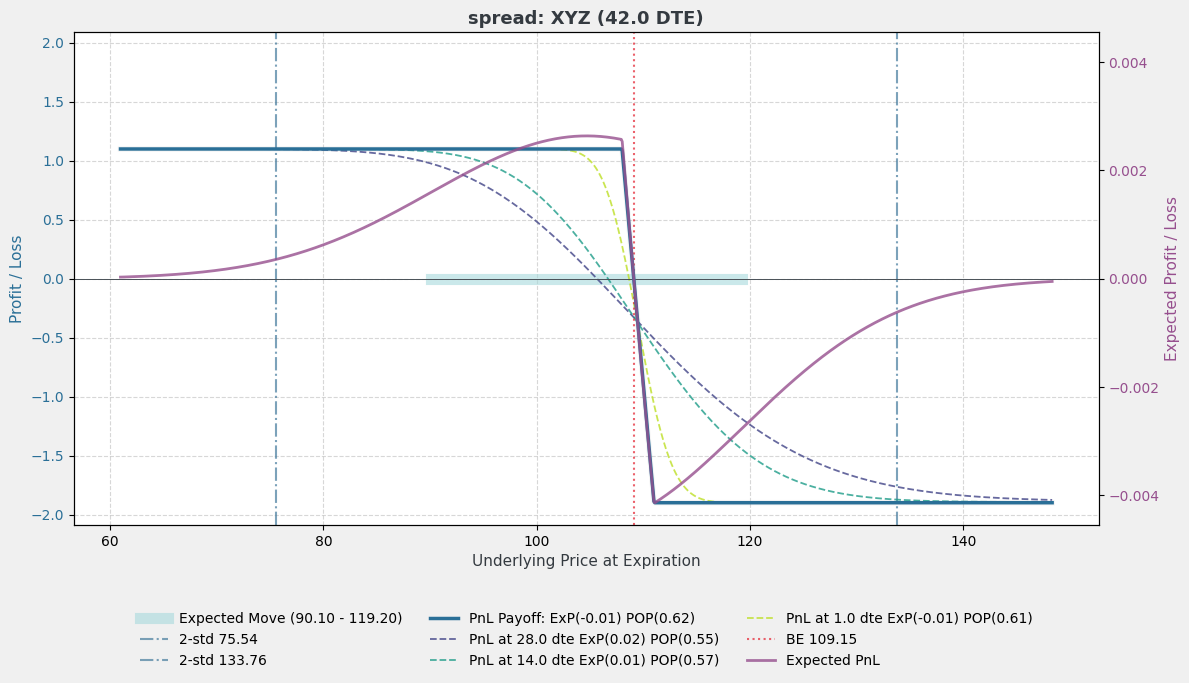

Total Margin: 189.99999999999994
Total Cash: 189.99999999999994
partition length =  0
partition length =  4
OptionStrategy
<class 'option_strategy_sim.core.OptionStrategy'>
{
    "underlying_price": 104.65,
    "underlying_symbol": "XYZ",
    "days_to_expiration": 51.0,
    "volatility": 0.41,
    "expected_move": 16.03842601975318,
    "pop": 0.6091239379993713,
    "expected_profit": -0.046342630483812264,
    "cost": -110.00000000000006,
    "theta": -0.944835954112538,
    "delta": -0.04173625873001402,
    "vega": 30.583290383327753,
    "title": "calendar_spread",
    "monte_carlo": false,
    "stddev_range": 3.0,
    "num_simulations": 1000,
    "r": 0.05,
    "year_days": 365
}
OptionLeg's
<class 'option_strategy_sim.leg.OptionLeg'>
{
    "option_type": "C",
    "strike_price": 111.0,
    "quantity": 1,
    "days_to_expiration": 60.0,
    "volatility": 0.41,
    "mark": 3.3,
    "delta": 0.4122277355247093,
    "vega": 16.515591600991858,
    "theta": -0.3446031395754729,
    "

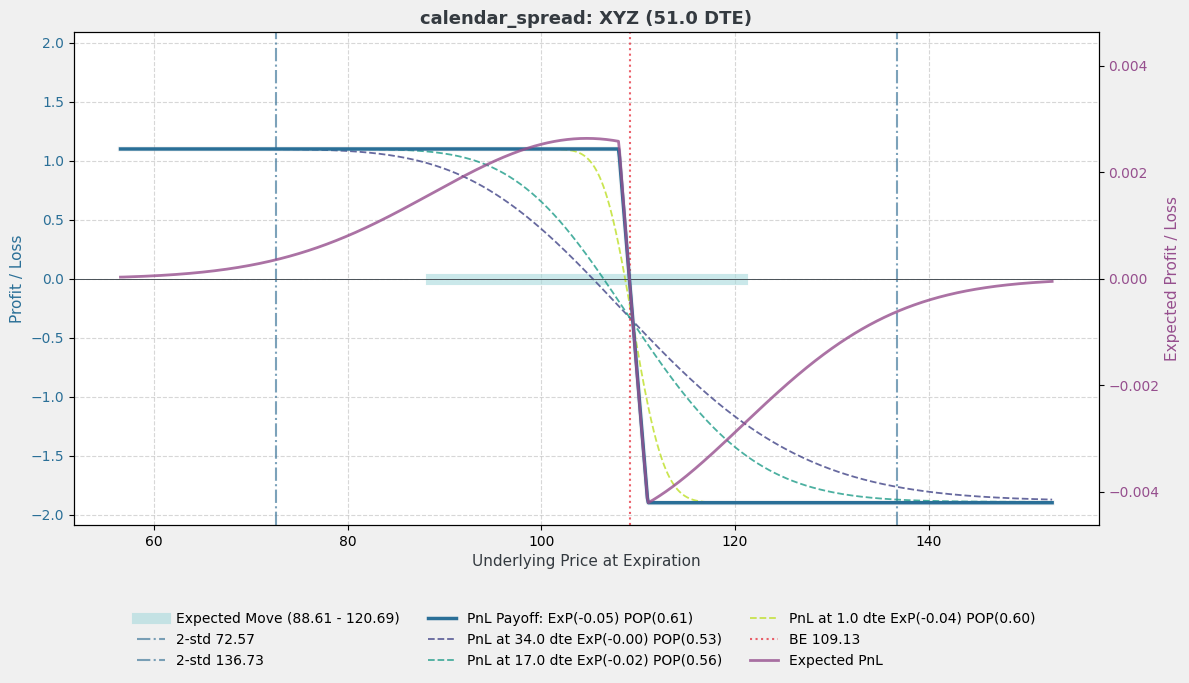

In [1]:

import sys
sys.path.insert(0,"src")
sys.path.insert(0,"../src")

from option_strategy_sim import OptionStrategy
import json 

# SETUP
symbol: str = "XYZ"
underlying_price: float = 104.65
dte: float = 42
volatility: float = 0.22
strike: float = 115.0

calls = [
    {'option_type':'C', 'strike_price':105.0, 'mark':5.68, 'volatility':0.41, 'days_to_expiration':dte},
    {'option_type':'C', 'strike_price':108.0, 'mark':4.40, 'volatility':0.41, 'days_to_expiration':dte},
    {'option_type':'C', 'strike_price':111.0, 'mark':3.30, 'volatility':0.41, 'days_to_expiration':dte},
    ]

puts = [
    {'option_type':'P', 'strike_price':104.0, 'mark':5.10, 'volatility':0.37, 'days_to_expiration':dte},
    {'option_type':'P', 'strike_price':101.0, 'mark':3.75, 'volatility':0.37, 'days_to_expiration':dte},
    {'option_type':'P', 'strike_price':98.0, 'mark':2.68, 'volatility':0.37, 'days_to_expiration':dte},
    ]

stocks = [
    {'option_type':'S', 'strike_price':underlying_price, 'mark':underlying_price, 'volatility':0.37},
    ]


sell = { "quantity": -1 }
buy = { "quantity": 1 }
buys = { "quantity": 100 }

xtests: dict = {
    "longCall":     [{**calls[1], **buy } ],
    "longPut":      [{**puts[1],  **buy }],
    "shortPut":     [{**puts[1],  **sell }],
    "longStraddle": [
        {**calls[0], **buy }, 
        { **puts[0], **buy }
        ],
    "condor": [
        {**calls[2], **buy }, 
        {**calls[1], **sell }, 
        { **puts[1], **sell },
        { **puts[2], **buy },
        ],
}
tests: dict = {
    #"longCall":     [{**calls[1], **buy } ],
    #"stocks":     [{**stocks[0], **buys } ],
    #"covered":    [{**stocks[0], **buys } , {**calls[1], **sell }],
    #"spread":    [{**calls[1], **sell },{**calls[2], **buy } ],
    "spread": [
        {**calls[2], **buy }, 
        {**calls[1], **sell }, 
        ],
    "calendar_spread": [
        {**calls[2], **buy, "days_to_expiration":60 }, 
        {**calls[1], **sell }, 
        ],

}


def dump_obj(obj: object):
    print(str(type(obj)))
    print(json.dumps(dict(obj.repr()), indent=4))

for test, legs in tests.items():
    ostrat = OptionStrategy(
        title=test,
        underlying_price=underlying_price, 
        stddev_range = 3,
        num_simulations = 1000,

        )
    for leg in legs:
        # leg["mark"] = bscholes(leg,d,underlying_price)
        # ostrat.add_leg(**{**leg, "mark":None})
        ostrat.add_leg(**leg)

    # Now you can get margin:
    cash , margin = ostrat.margin()
    print("Total Margin:", margin)
    print("Total Cash:", cash)

    print("partition length = ", len(ostrat.pnls))
    ostrat.add_pnl(partitions=3)
    ostrat.add_pnl(dte=1)
    print("partition length = ", len(ostrat.pnls))

    print("OptionStrategy")
    dump_obj(ostrat)
    print("OptionLeg's")
    for leg in ostrat.legs:
        dump_obj(leg)
    print("OptionPnL's")
    for pnl in ostrat.pnls:
        dump_obj(pnl)

    ostrat.plot_strategy()

